<a href="https://colab.research.google.com/github/omniaghazy/zero/blob/main/Assignment_3_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Data Description

Variable   	Definition   	Key


survival	    Survival	  0 = No, 1 = Yes

pclass	       Ticket class	  1 = 1st, 2 = 2nd, 3 = 3rd

sex             	Sex

Age        	Age in years

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic

ticket	Ticket number

fare	Passenger fare

cabin	Cabin number

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton






Variable Notes
pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [6]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

**Unuseful**


"PassengerId","Name","Ticket"   =======> drop

"Survived"                      ===> target


# Exploring the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

**T**here is no any duplicated rows

# Missing Values

In [12]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
round(df.isna().mean()*100 , 2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


less than 5~10 % ===>dropna()

(10 ~ 40) ====> impute

more than 40 ===> drop this feature

In [14]:
df.dropna(subset=["Embarked"],inplace = True)

In [15]:
df.isna().mean() * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.910011
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [16]:
df.Age.describe()

,Age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


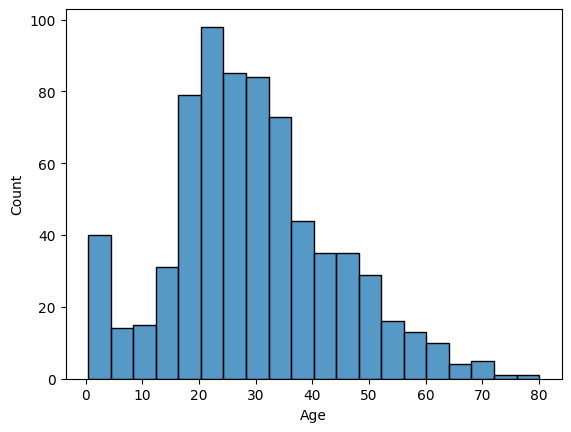

In [17]:
sns.histplot(data= df ,x = "Age")
plt.show()

age ====> gender ,pclass


In [18]:
df.groupby(["Sex" ,"Pclass"])["Age"].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [19]:
# df['Age'] = df.groupby(["Sex" ,"Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[['Age']] = imputer.fit_transform(df[['Age']])

# drop cols

In [20]:
df.drop(["Cabin","PassengerId","Name","Ticket"] ,axis = 1 ,inplace = True)

# Analysis

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# univariat analysis

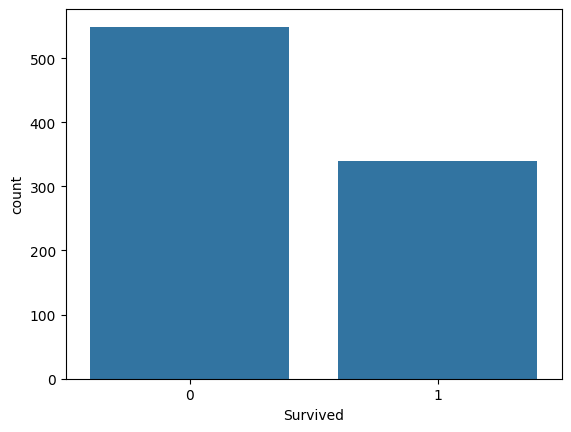

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64


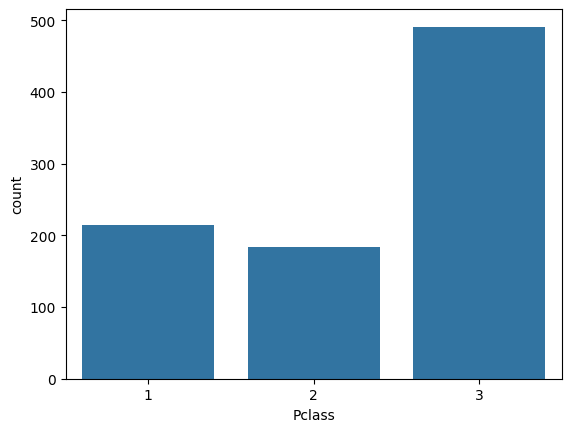

Pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64


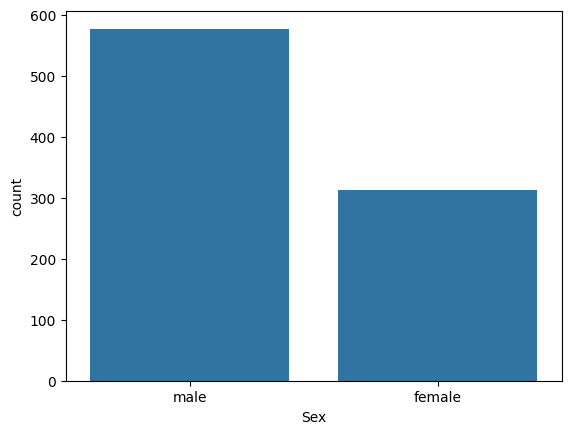

Sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64


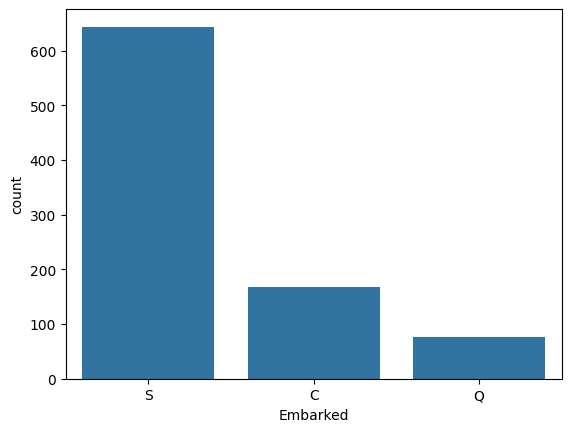

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


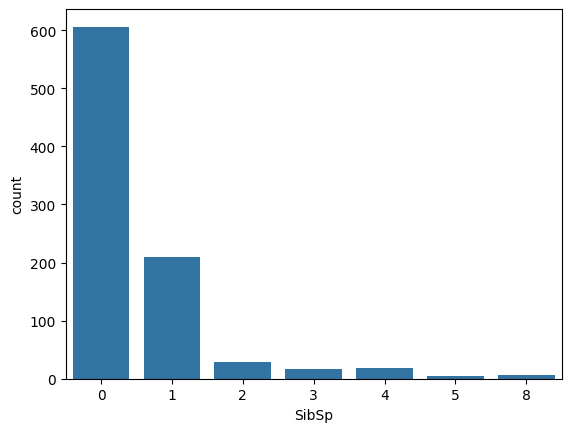

SibSp
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: proportion, dtype: float64


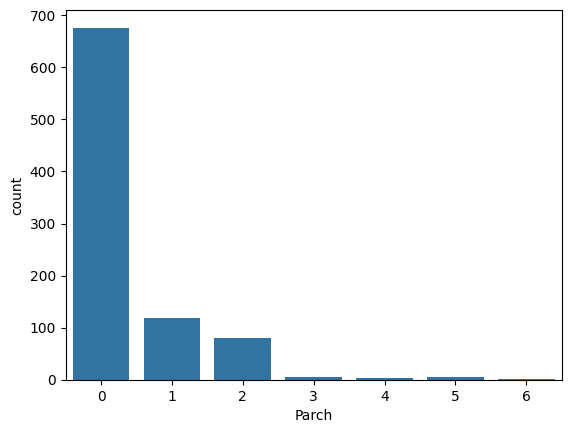

Parch
0    0.760405
1    0.132733
2    0.089989
5    0.005624
3    0.005624
4    0.004499
6    0.001125
Name: proportion, dtype: float64


In [22]:
categorical_list = ["Survived","Pclass","Sex","Embarked","SibSp"	,"Parch"]
for i in categorical_list:
    sns.countplot(data = df , x= i)
    plt.show()
    print(df[i].value_counts(normalize=True))

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


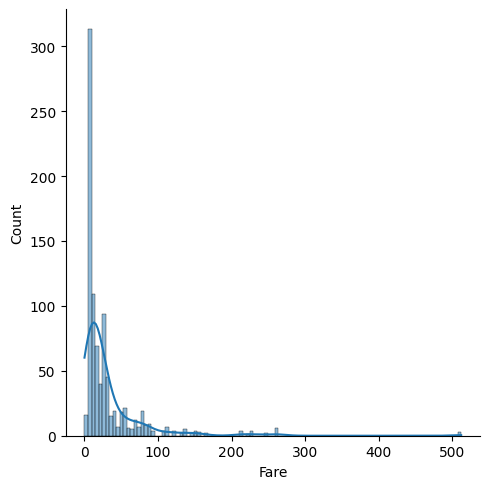

count    889.000000
mean      29.642093
std       12.968346
min        0.420000
25%       22.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: Age, dtype: float64


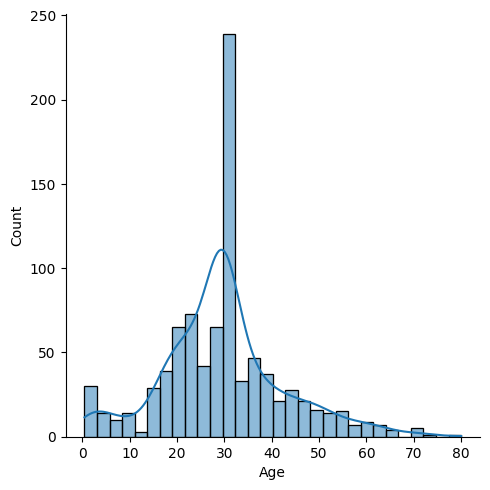

In [23]:
numerical_list=["Fare" ,"Age"]
for i in numerical_list:
    print(df[i].describe())
    sns.displot(data = df ,x=i ,kde =True)
    plt.show()

# bivariate analysis

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
df.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [26]:
df.groupby("Pclass")["Survived"].value_counts(normalize=True)

Pclass  Survived
1       1           0.626168
        0           0.373832
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

# *insights***

survivred :

class 1

class2

class3



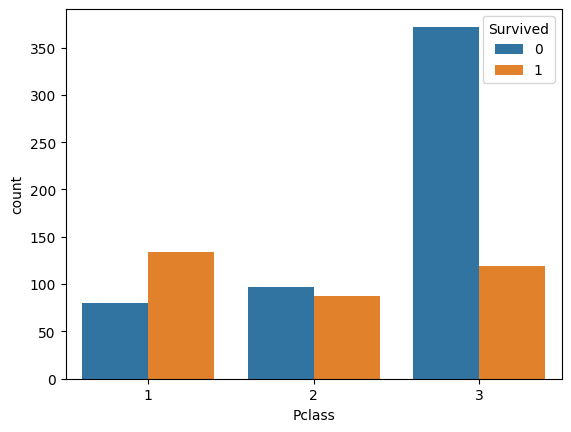

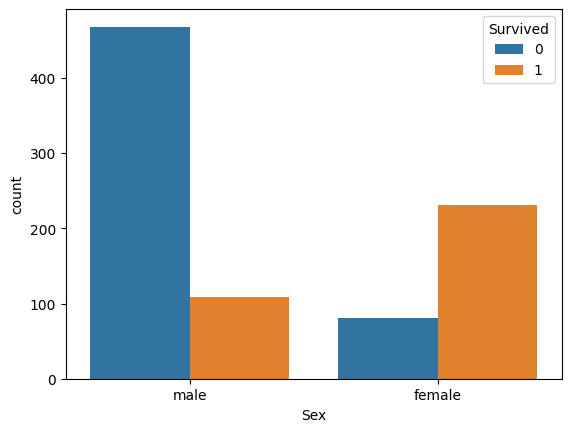

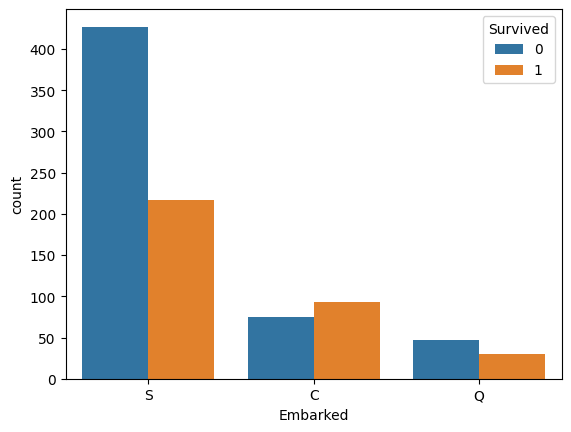

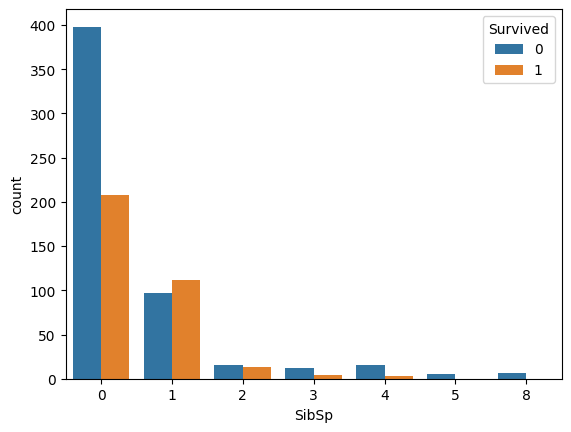

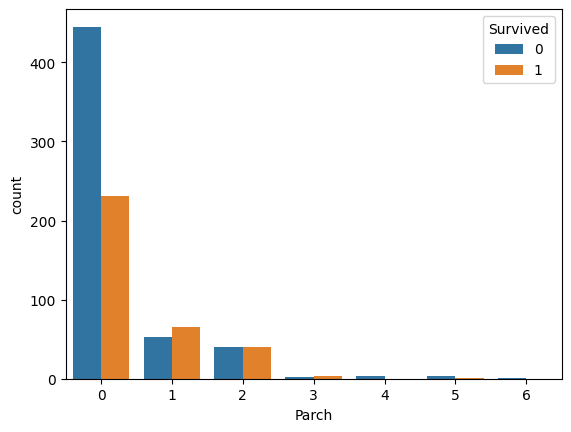

In [27]:
categorical_list = ["Pclass","Sex","Embarked","SibSp","Parch"]
for i in categorical_list:
    sns.countplot(data = df , x= i ,hue ="Survived")
    plt.show()


Survived
0    22.117887
1    48.209498
Name: Fare, dtype: float64


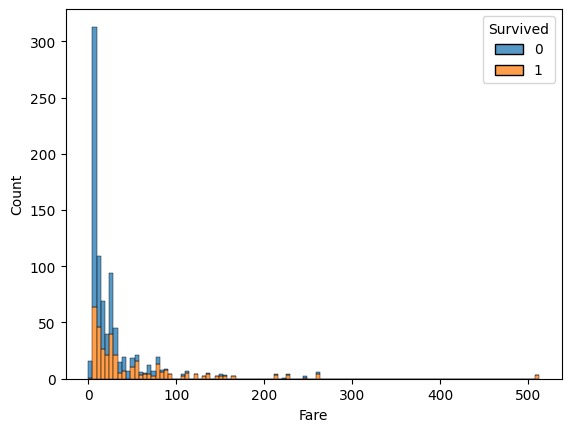

Survived
0    30.402116
1    28.414879
Name: Age, dtype: float64


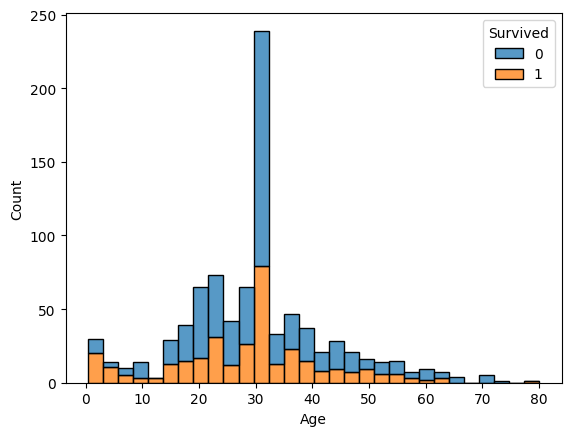

In [28]:
numerical_list=["Fare" ,"Age"]
for i in numerical_list:
    print(df.groupby("Survived")[i].mean())
    sns.histplot(data = df ,x=i  ,hue ="Survived" ,multiple='stack')
    plt.show()

In [29]:
print("Survived = 1")
print(df[df["Survived"] ==1 ].Age.describe())
print("Survived = 0")

print(df[df["Survived"] ==0 ].Age.describe())
print("Survived = 1")

print(df[df["Survived"] ==1 ].Fare.describe())
print("Survived = 0")

print(df[df["Survived"] ==0 ].Fare.describe())

Survived = 1
count    340.000000
mean      28.414879
std       13.682062
min        0.420000
25%       21.000000
50%       29.642093
75%       35.000000
max       80.000000
Name: Age, dtype: float64
Survived = 0
count    549.000000
mean      30.402116
std       12.458141
min        1.000000
25%       23.000000
50%       29.642093
75%       35.000000
max       74.000000
Name: Age, dtype: float64
Survived = 1
count    340.000000
mean      48.209498
std       66.748773
min        0.000000
25%       12.443750
50%       26.000000
75%       56.946900
max      512.329200
Name: Fare, dtype: float64
Survived = 0
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


# Outliers

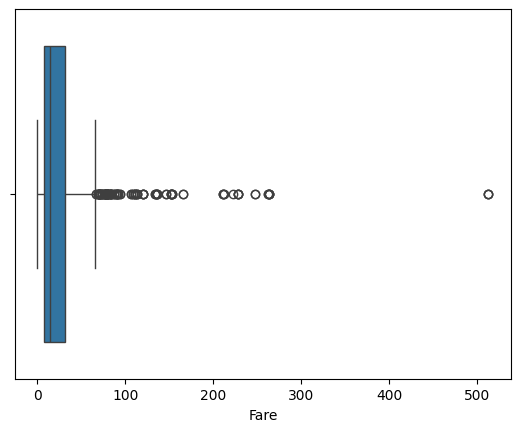

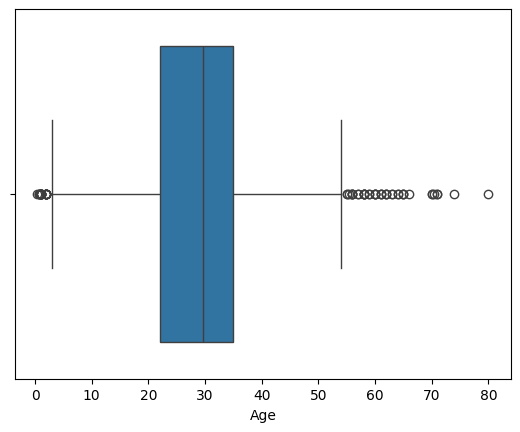

In [30]:
numerical_list=["Fare" ,"Age"]
for i in numerical_list:
    sns.boxplot(x=df[i])
    plt.show()

In [31]:
df = df[df["Fare"] <300]

In [32]:
df.shape

(886, 8)

In [33]:
# Split Age into groups
df['age_group'] = pd.cut(df.Age, bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df.Fare, bins=[-0.99, 8, 30, 150, 300], labels=['low', 'medium', 'high', 'very high'])

In [34]:
df.head(

)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,child,low
1,1,1,female,38.0,1,0,71.2833,C,senior,high
2,1,3,female,26.0,0,0,7.9250,S,young,low
3,1,1,female,35.0,1,0,53.1000,S,adult,high
4,0,3,male,35.0,0,0,8.0500,S,adult,medium


In [35]:
cate = ['age_group','fare_group']
for i in cate:
    print(df.groupby(i)["Survived"].mean())

age_group
child     0.424242
young     0.405660
adult     0.349862
senior    0.370968
Name: Survived, dtype: float64
fare_group
low          0.215768
medium       0.370192
high         0.561576
very high    0.653846
Name: Survived, dtype: float64


/tmp/ipython-input-624808754.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(i)["Survived"].mean())


fare (high)  ===== survived

child ,young  ==== Survived

# Multivariate Analysis

In [36]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.331075,-0.076637,-0.032095,0.083691,0.259188
Pclass,-0.331075,1.000000,-0.327398,0.079490,0.016579,-0.603362
Age,-0.076637,-0.327398,1.000000,-0.231366,-0.178157,0.090029
SibSp,-0.032095,0.079490,-0.231366,1.000000,0.414844,0.213507
Parch,0.083691,0.016579,-0.178157,0.414844,1.000000,0.265692
Fare,0.259188,-0.603362,0.090029,0.213507,0.265692,1.000000


<Axes: >

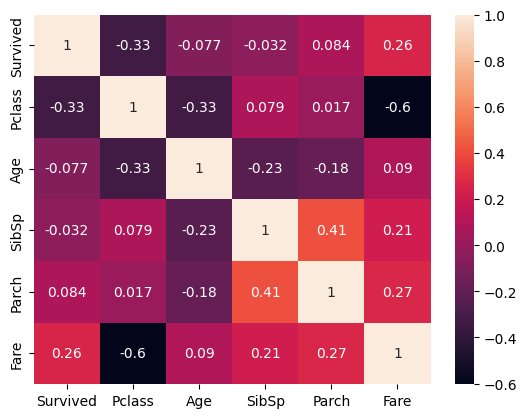

In [37]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,child,low
1,1,1,female,38.0,1,0,71.2833,C,senior,high
2,1,3,female,26.0,0,0,7.9250,S,young,low
3,1,1,female,35.0,1,0,53.1000,S,adult,high
4,0,3,male,35.0,0,0,8.0500,S,adult,medium


In [39]:
dataset = df.drop(["Age","Fare"],axis=1)

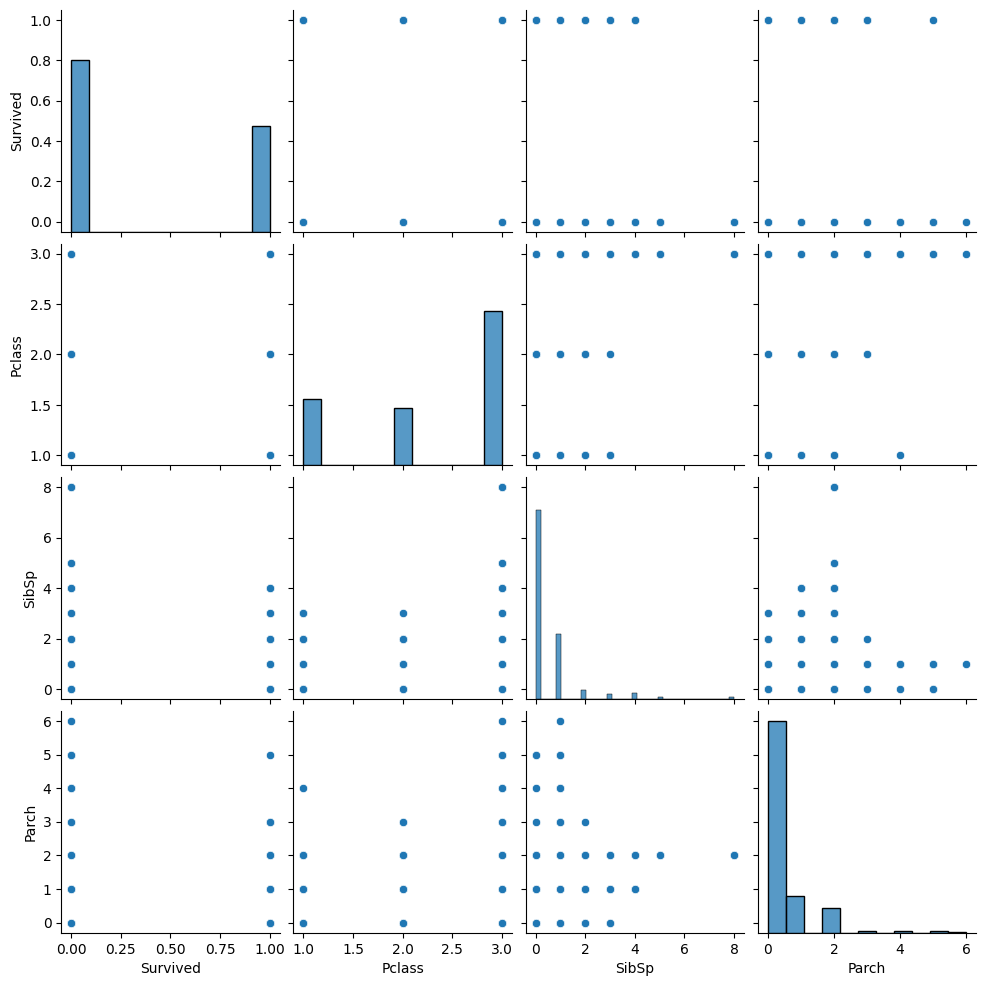

In [40]:
sns.pairplot(dataset);

In [41]:
df.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.967033
        male      0.358333
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [42]:
dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,age_group,fare_group
0,0,3,male,1,0,S,child,low
1,1,1,female,1,0,C,senior,high
2,1,3,female,0,0,S,young,low
3,1,1,female,1,0,S,adult,high
4,0,3,male,0,0,S,adult,medium


# The higher the class, the higher the survival rate
# The higher the fare, the higher the survival rate
# Females had a higher survival rate